In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.shape

(303, 14)

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

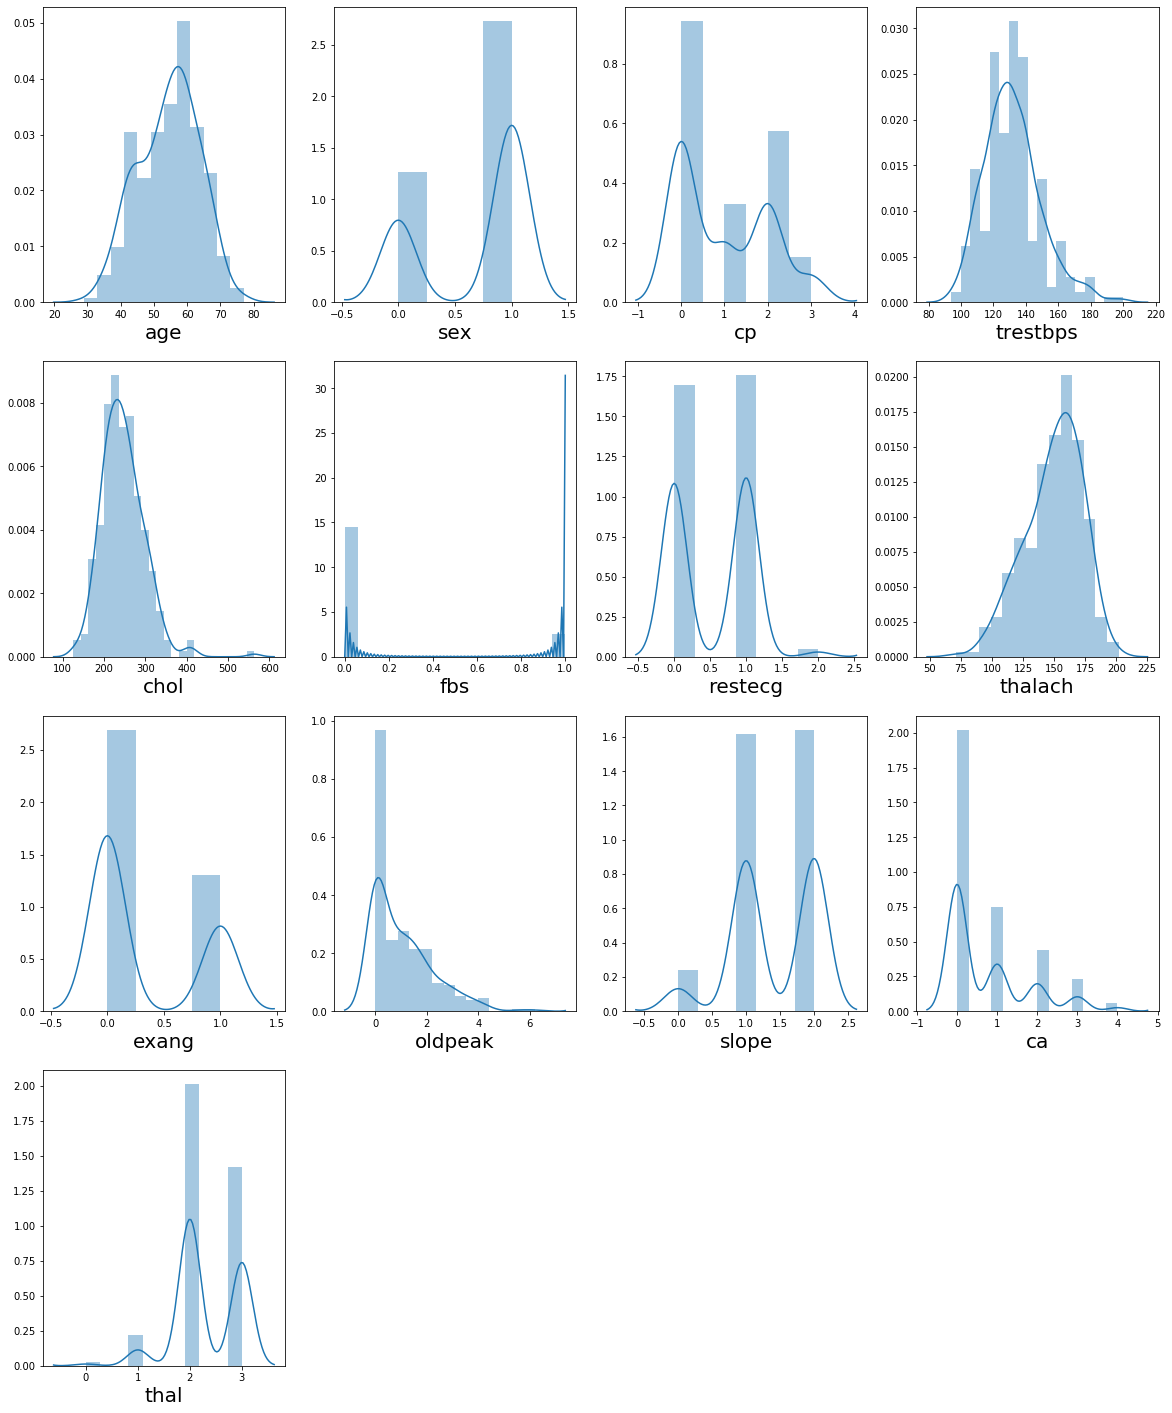

In [7]:
plt.figure(figsize=(20,25))
plot = 1

for c in df:
    if plot<14:
        ax=plt.subplot(4,4,plot)
        sns.distplot(df[c])
        plt.xlabel(c, fontsize=20)
    plot += 1

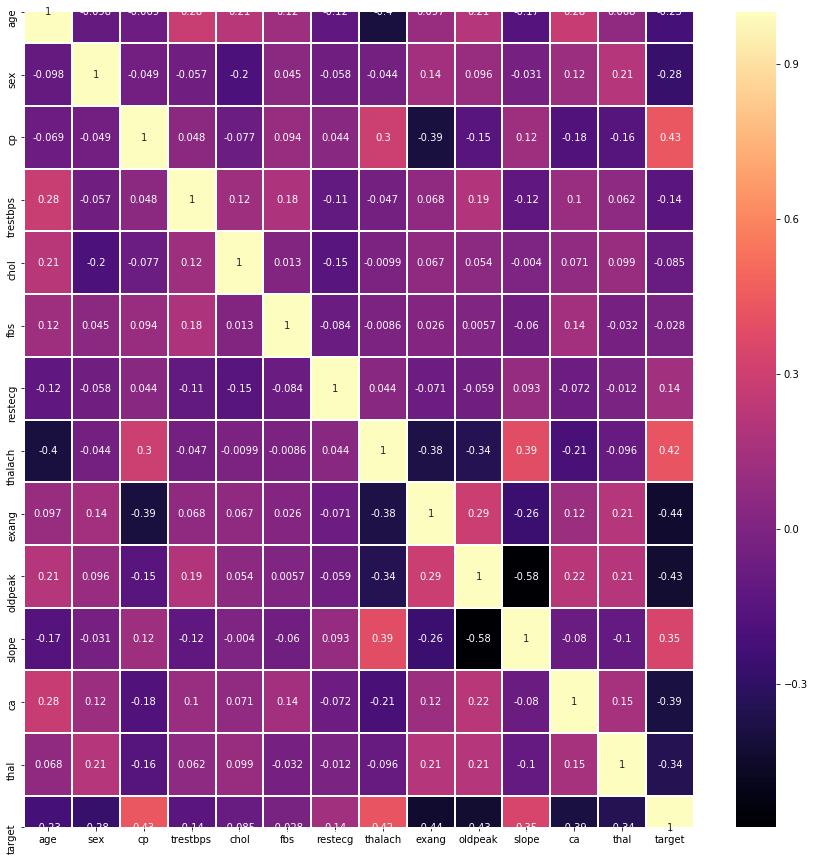

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

In [9]:
df.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

Huge variance. We should normalise it.

In [10]:
df['trestbps']=np.log(df['trestbps'])
df['chol']=np.log(df['chol'])
df['thalach']=np.log(df['thalach'])

In [11]:
df['trestbps'].var()

0.01694963250236726

In [12]:
df['chol'].var()

0.04153780598355813

In [13]:
df['thalach'].var()

0.027143394718192854

In [14]:
X = df.drop('target', axis=1)
y = df['target']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Logistic Regression

In [16]:
accuracies = {}

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
accuracies['Logistic Regression'] = accuracy_score(y_test, y_pred)*100

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report: ")
print(classification_report(y_test, y_pred))


Accuracy Score:
0.8901098901098901

Confusion Matrix: 
[[38  6]
 [ 4 43]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        44
           1       0.88      0.91      0.90        47

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91



C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# K NearestNeighbours

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("Accuracy Score:")
print(accuracy_score(y_test, pred))
accuracies['KNN'] = accuracy_score(y_test, pred)*100

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, pred))

print("\nClassification Report: ")
print(classification_report(y_test, pred))

Accuracy Score:
0.7582417582417582

Confusion Matrix: 
[[34 10]
 [12 35]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        44
           1       0.78      0.74      0.76        47

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [19]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

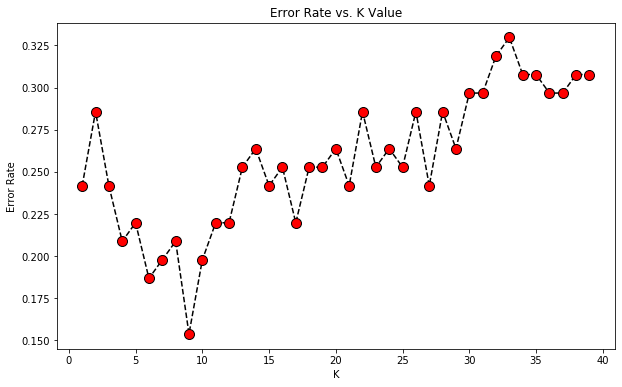

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='black', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [21]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('\t\t\t With K = 9\n')
print("Accuracy Score:")
print(accuracy_score(y_test, pred))
accuracies['KNN with k=9'] = accuracy_score(y_test, pred)*100

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, pred))

print("\nClassification Report: ")
print(classification_report(y_test, pred))

			 With K = 9

Accuracy Score:
0.8461538461538461

Confusion Matrix: 
[[33 11]
 [ 3 44]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        44
           1       0.80      0.94      0.86        47

    accuracy                           0.85        91
   macro avg       0.86      0.84      0.84        91
weighted avg       0.86      0.85      0.84        91



# SVM

In [22]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

print("Accuracy Score:")
print(accuracy_score(y_test, svc_pred))
accuracies['SVM'] = accuracy_score(y_test, svc_pred)*100

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, svc_pred))

print("\nClassification Report: ")
print(classification_report(y_test, svc_pred))

Accuracy Score:
0.8571428571428571

Confusion Matrix: 
[[36  8]
 [ 5 42]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        44
           1       0.84      0.89      0.87        47

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Accuracy Score:")
print(accuracy_score(y_test, rf_pred))
accuracies['Random Forest'] = accuracy_score(y_test, rf_pred)*100

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, rf_pred))

print("\nClassification Report: ")
print(classification_report(y_test, rf_pred))

Accuracy Score:
0.8241758241758241

Confusion Matrix: 
[[38  6]
 [10 37]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.86      0.83        44
           1       0.86      0.79      0.82        47

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth' : [2,3,5,7,None],
    'max_features': [2,3,4,5,6,8,9,10,11,12,13]
}

rf_randcv = RandomizedSearchCV(estimator=rf,
                               param_distributions= parameters,
                               cv=5, 
                               n_iter=50,
                               scoring='accuracy',
                               n_jobs=-1,
                               verbose=5,
                               return_train_score=True,
                               random_state=42
                              )

rf_randcv.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   21.2s finished
C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

In [25]:
rf_randcv.best_params_

{'n_estimators': 200, 'max_features': 3, 'max_depth': 2}

In [26]:
rf_randcv.best_score_

0.8349056603773585

# XGB Classifier

In [27]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

print("Accuracy Score:")
print(accuracy_score(y_test, xgb_pred))
accuracies['XGB Classifier'] = accuracy_score(y_test, xgb_pred)*100

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, xgb_pred))

print("\nClassification Report: ")
print(classification_report(y_test, xgb_pred))

Accuracy Score:
0.8461538461538461

Confusion Matrix: 
[[34 10]
 [ 4 43]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        44
           1       0.81      0.91      0.86        47

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



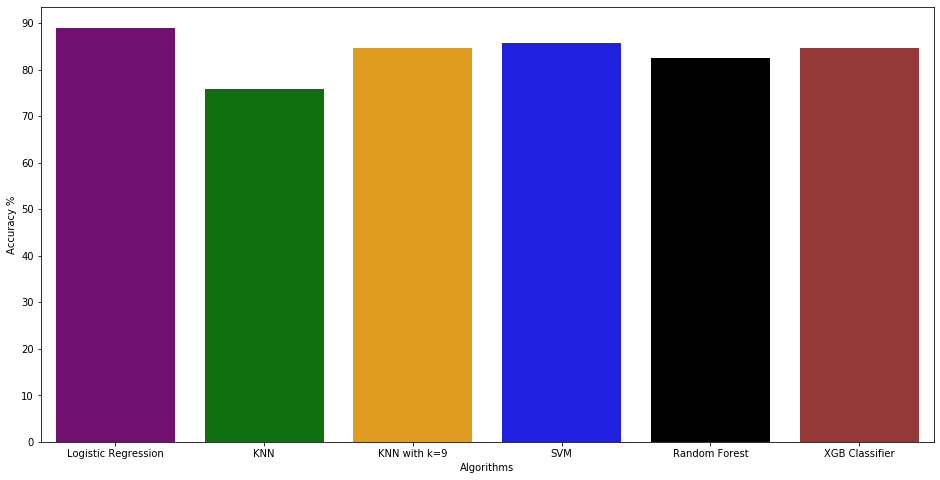

In [31]:
colors = ["purple", "green", "orange","blue","black", "brown"]

plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()